In [465]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams.update({
    'font.family': 'serif',  # or 'sans-serif'
    'font.size': 10,         # base font size
    'axes.labelsize': 10,    # axis label size
    'axes.titlesize': 12,    # title size
    'xtick.labelsize': 8,    # x-axis tick label size
    'ytick.labelsize': 8,    # y-axis tick label size
    'legend.fontsize': 8,    # legend font size
})

DATASET_COLORS = {
    "trivia_qa_2_60k": "#000000",    # black
    "cities_10k": "#e41a1c",         # red
    "gsm8k": "#4daf4a",              # green
    "math_operations_6k": "#377eb8",  # darker yellow (gold)
    "medals_9k": "#ff7f00",          # orange
    "birth_years_4k": "#984ea3",     # purple
}
DATASET_MARKERS = {
    "trivia_qa_2_60k": "o",    # circle
    "cities_10k": "s",          # square
    "gsm8k": "D",              # diamond
    "math_operations_6k": "^",  # triangle up
    "medals_9k": "X",          # uppercase X for thicker x
    "birth_years_4k": "P",      # uppercase P for thicker plus
}


qwen_2_7b_stats_file = "qwen_2.5_7b_instruct/classification_data/train_test_data.csv"
qwen_32b_stats_file = "deepseek_qwen_32b/classification_data/train_test_data.csv"
llama3_8b_stats_file = "llama3.1_8b_chat/classification_data/train_test_data.csv"
llama3_70b_stats_file = "llama3.3_70b/classification_data/train_test_data.csv"
mistral_8b_stats_file = "ministral_8b_instruct/classification_data/train_test_data.csv"
mistral_7b_stats_file = "mistral_7b_instruct/classification_data/res_df_train_test_different_datasets.csv"


In [466]:
def clean_datset(df):
    df["prompt_id_train"] = df["prompt_id_train"].str.replace("base_3_shot", "base")
    df["prompt_id_test"] = df["prompt_id_test"].str.replace("base_3_shot", "base")
    df = df[df["prompt_id_train"] == "base"]
    df = df[df["prompt_id_test"] == "base"]
    return df


In [467]:
qwen_2_7b_stats_df = clean_datset(pd.read_csv(qwen_2_7b_stats_file))
qwen_2_7b_stats_df


,model_id_train,dataset_id_train,prompt_id_train,subset_id_train,input_type_train,model_id_test,dataset_id_test,prompt_id_test,subset_id_test,input_type_test,...,direction__center_from_origin_True__classifier_cut_zero__optimal_train_set_cut,direction__center_from_origin_True__classifier_cut_zero__test_roc_auc,direction__center_from_origin_True__classifier_cut_zero__train_accuracy_score,direction__center_from_origin_True__classifier_cut_zero__test_accuracy_score,direction__center_from_origin_True__classifier_cut_zero__train_f1_score,direction__center_from_origin_True__classifier_cut_zero__test_f1_score,direction__center_from_origin_True__classifier_cut_zero__train_precision_score,direction__center_from_origin_True__classifier_cut_zero__test_precision_score,direction__center_from_origin_True__classifier_cut_zero__train_recall_score,direction__center_from_origin_True__classifier_cut_zero__test_recall_score
0,qwen_2.5_7b_instruct,birth_years_4k,base,main,prompt_only,qwen_2.5_7b_instruct,birth_years_4k,base,main,prompt_only,...,-0.364576,0.547436,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,qwen_2.5_7b_instruct,birth_years_4k,base,main,prompt_only,qwen_2.5_7b_instruct,birth_years_4k,base,main,prompt_only,...,-0.622863,0.569855,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,qwen_2.5_7b_instruct,birth_years_4k,base,main,prompt_only,qwen_2.5_7b_instruct,birth_years_4k,base,main,prompt_only,...,-0.451213,0.569530,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,qwen_2.5_7b_instruct,birth_years_4k,base,main,prompt_only,qwen_2.5_7b_instruct,birth_years_4k,base,main,prompt_only,...,-0.107710,0.568418,0.542148,0.545337,0.327509,0.328872,0.616541,0.627737,0.222978,0.222798
4,qwen_2.5_7b_instruct,birth_years_4k,base,main,prompt_only,qwen_2.5_7b_instruct,birth_years_4k,base,main,prompt_only,...,0.022207,0.578467,0.558667,0.556022,0.468273,0.472546,0.588889,0.581967,0.388667,0.397759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,qwen_2.5_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,qwen_2.5_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,...,147.515381,0.721544,0.515637,0.516915,0.673211,0.674052,0.507960,0.508612,0.997826,0.999005
2516,qwen_2.5_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,qwen_2.5_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,...,144.863129,0.716521,0.515593,0.513414,0.673300,0.672156,0.507934,0.506815,0.998320,0.997615
2517,qwen_2.5_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,qwen_2.5_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,...,148.566666,0.724684,0.515566,0.517377,0.673265,0.673919,0.507920,0.508865,0.998215,0.997447
2518,qwen_2.5_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,qwen_2.5_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,...,147.850266,0.713317,0.515891,0.514203,0.673392,0.672646,0.508089,0.507217,0.998122,0.998212


In [468]:
qwen_32b_stats_df = clean_datset(pd.read_csv(qwen_32b_stats_file))
qwen_32b_stats_df


,model_id_train,dataset_id_train,prompt_id_train,subset_id_train,input_type_train,model_id_test,dataset_id_test,prompt_id_test,subset_id_test,input_type_test,...,direction__center_from_origin_True__classifier_cut_zero__optimal_train_set_cut,direction__center_from_origin_True__classifier_cut_zero__test_roc_auc,direction__center_from_origin_True__classifier_cut_zero__train_accuracy_score,direction__center_from_origin_True__classifier_cut_zero__test_accuracy_score,direction__center_from_origin_True__classifier_cut_zero__train_f1_score,direction__center_from_origin_True__classifier_cut_zero__test_f1_score,direction__center_from_origin_True__classifier_cut_zero__train_precision_score,direction__center_from_origin_True__classifier_cut_zero__test_precision_score,direction__center_from_origin_True__classifier_cut_zero__train_recall_score,direction__center_from_origin_True__classifier_cut_zero__test_recall_score
0,deepseek_qwen_32b,birth_years_4k,base,main,prompt_only,deepseek_qwen_32b,birth_years_4k,base,main,prompt_only,...,-1.631041,0.551967,0.500290,0.500000,0.001161,0.000000,1.000000,0.000000,0.000581,0.000000
1,deepseek_qwen_32b,birth_years_4k,base,main,prompt_only,deepseek_qwen_32b,birth_years_4k,base,main,prompt_only,...,-5.876939,0.549547,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,deepseek_qwen_32b,birth_years_4k,base,main,prompt_only,deepseek_qwen_32b,birth_years_4k,base,main,prompt_only,...,-1.509443,0.547217,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,deepseek_qwen_32b,birth_years_4k,base,main,prompt_only,deepseek_qwen_32b,birth_years_4k,base,main,prompt_only,...,-2.162062,0.552650,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,deepseek_qwen_32b,birth_years_4k,base,main,prompt_only,deepseek_qwen_32b,birth_years_4k,base,main,prompt_only,...,-2.012828,0.562010,0.500285,0.500000,0.001139,0.000000,1.000000,0.000000,0.000570,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,deepseek_qwen_32b,trivia_qa_2_60k,base,main,prompt_only,deepseek_qwen_32b,trivia_qa_2_60k,base,main,prompt_only,...,393.660400,0.684686,0.529894,0.528700,0.677027,0.676564,0.515642,0.514992,0.985452,0.985864
2876,deepseek_qwen_32b,trivia_qa_2_60k,base,main,prompt_only,deepseek_qwen_32b,trivia_qa_2_60k,base,main,prompt_only,...,394.703918,0.682813,0.529087,0.526019,0.676909,0.674944,0.515189,0.513578,0.986612,0.984172
2877,deepseek_qwen_32b,trivia_qa_2_60k,base,main,prompt_only,deepseek_qwen_32b,trivia_qa_2_60k,base,main,prompt_only,...,397.493958,0.680303,0.527757,0.528510,0.676248,0.676187,0.514477,0.514910,0.986414,0.984566
2878,deepseek_qwen_32b,trivia_qa_2_60k,base,main,prompt_only,deepseek_qwen_32b,trivia_qa_2_60k,base,main,prompt_only,...,399.870422,0.671168,0.527452,0.529591,0.675903,0.677775,0.514327,0.515414,0.985498,0.989469


In [469]:
llama3_8b_stats_df = clean_datset(pd.read_csv(llama3_8b_stats_file))
llama3_8b_stats_df

,model_id_train,dataset_id_train,prompt_id_train,subset_id_train,input_type_train,model_id_test,dataset_id_test,prompt_id_test,subset_id_test,input_type_test,...,direction__center_from_origin_True__classifier_cut_zero__optimal_train_set_cut,direction__center_from_origin_True__classifier_cut_zero__test_roc_auc,direction__center_from_origin_True__classifier_cut_zero__train_accuracy_score,direction__center_from_origin_True__classifier_cut_zero__test_accuracy_score,direction__center_from_origin_True__classifier_cut_zero__train_f1_score,direction__center_from_origin_True__classifier_cut_zero__test_f1_score,direction__center_from_origin_True__classifier_cut_zero__train_precision_score,direction__center_from_origin_True__classifier_cut_zero__test_precision_score,direction__center_from_origin_True__classifier_cut_zero__train_recall_score,direction__center_from_origin_True__classifier_cut_zero__test_recall_score
0,llama3.1_8b_chat,birth_years_4k,base,main,prompt_only,llama3.1_8b_chat,birth_years_4k,base,main,prompt_only,...,0.317117,0.591822,0.500000,0.500000,0.666667,0.666667,0.500000,0.500000,1.000000,1.000000
1,llama3.1_8b_chat,birth_years_4k,base,main,prompt_only,llama3.1_8b_chat,birth_years_4k,base,main,prompt_only,...,0.090621,0.562054,0.500000,0.500000,0.666667,0.666667,0.500000,0.500000,1.000000,1.000000
2,llama3.1_8b_chat,birth_years_4k,base,main,prompt_only,llama3.1_8b_chat,birth_years_4k,base,main,prompt_only,...,0.104872,0.557533,0.500000,0.500000,0.666667,0.666667,0.500000,0.500000,1.000000,1.000000
3,llama3.1_8b_chat,birth_years_4k,base,main,prompt_only,llama3.1_8b_chat,birth_years_4k,base,main,prompt_only,...,0.194001,0.493205,0.500000,0.500000,0.666667,0.666667,0.500000,0.500000,1.000000,1.000000
4,llama3.1_8b_chat,birth_years_4k,base,main,prompt_only,llama3.1_8b_chat,birth_years_4k,base,main,prompt_only,...,0.103900,0.535745,0.500000,0.500000,0.666667,0.666667,0.500000,0.500000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,llama3.1_8b_chat,trivia_qa_2_60k,base,main,prompt_only,llama3.1_8b_chat,trivia_qa_2_60k,base,main,prompt_only,...,13.645540,0.769617,0.521248,0.518772,0.675692,0.674723,0.510883,0.509583,0.997474,0.998212
2876,llama3.1_8b_chat,trivia_qa_2_60k,base,main,prompt_only,llama3.1_8b_chat,trivia_qa_2_60k,base,main,prompt_only,...,12.834138,0.778130,0.523767,0.521778,0.676358,0.675703,0.512232,0.511172,0.995247,0.996420
2877,llama3.1_8b_chat,trivia_qa_2_60k,base,main,prompt_only,llama3.1_8b_chat,trivia_qa_2_60k,base,main,prompt_only,...,12.531933,0.763429,0.521875,0.522823,0.675621,0.675516,0.511230,0.511757,0.995848,0.993393
2878,llama3.1_8b_chat,trivia_qa_2_60k,base,main,prompt_only,llama3.1_8b_chat,trivia_qa_2_60k,base,main,prompt_only,...,12.893509,0.774424,0.521045,0.521956,0.675268,0.675799,0.510793,0.511265,0.995970,0.996487


In [470]:
llama3_70b_stats_df = clean_datset(pd.read_csv(llama3_70b_stats_file))
llama3_70b_stats_df

,model_id_train,dataset_id_train,prompt_id_train,subset_id_train,input_type_train,model_id_test,dataset_id_test,prompt_id_test,subset_id_test,input_type_test,...,direction__center_from_origin_True__classifier_cut_zero__optimal_train_set_cut,direction__center_from_origin_True__classifier_cut_zero__test_roc_auc,direction__center_from_origin_True__classifier_cut_zero__train_accuracy_score,direction__center_from_origin_True__classifier_cut_zero__test_accuracy_score,direction__center_from_origin_True__classifier_cut_zero__train_f1_score,direction__center_from_origin_True__classifier_cut_zero__test_f1_score,direction__center_from_origin_True__classifier_cut_zero__train_precision_score,direction__center_from_origin_True__classifier_cut_zero__test_precision_score,direction__center_from_origin_True__classifier_cut_zero__train_recall_score,direction__center_from_origin_True__classifier_cut_zero__test_recall_score
0,llama3.3_70b,birth_years_4k,base,main,prompt_only,llama3.3_70b,birth_years_4k,base,main,prompt_only,...,0.034710,0.574779,0.514925,0.500000,0.672269,0.666667,0.507614,0.500,0.995025,1.000000
1,llama3.3_70b,birth_years_4k,base,main,prompt_only,llama3.3_70b,birth_years_4k,base,main,prompt_only,...,-0.015043,0.534777,0.500000,0.500000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
2,llama3.3_70b,birth_years_4k,base,main,prompt_only,llama3.3_70b,birth_years_4k,base,main,prompt_only,...,-0.010632,0.503772,0.500000,0.500000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
3,llama3.3_70b,birth_years_4k,base,main,prompt_only,llama3.3_70b,birth_years_4k,base,main,prompt_only,...,0.000109,0.613536,0.585000,0.596154,0.626126,0.543478,0.569672,0.625,0.695000,0.480769
4,llama3.3_70b,birth_years_4k,base,main,prompt_only,llama3.3_70b,birth_years_4k,base,main,prompt_only,...,-0.007498,0.554820,0.524272,0.532609,0.132743,0.156863,0.750000,0.800,0.072816,0.086957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,llama3.3_70b,trivia_qa_2_60k,base,main,prompt_only,llama3.3_70b,trivia_qa_2_60k,base,main,prompt_only,...,19.779491,0.821217,0.500000,0.500000,0.666667,0.666667,0.500000,0.500,1.000000,1.000000
3596,llama3.3_70b,trivia_qa_2_60k,base,main,prompt_only,llama3.3_70b,trivia_qa_2_60k,base,main,prompt_only,...,18.971420,0.823565,0.500000,0.500000,0.666667,0.666667,0.500000,0.500,1.000000,1.000000
3597,llama3.3_70b,trivia_qa_2_60k,base,main,prompt_only,llama3.3_70b,trivia_qa_2_60k,base,main,prompt_only,...,19.543653,0.796315,0.500000,0.500000,0.666667,0.666667,0.500000,0.500,1.000000,1.000000
3598,llama3.3_70b,trivia_qa_2_60k,base,main,prompt_only,llama3.3_70b,trivia_qa_2_60k,base,main,prompt_only,...,19.236343,0.830721,0.500000,0.500000,0.666667,0.666667,0.500000,0.500,1.000000,1.000000


In [471]:
mistral_8b_stats_df = clean_datset(pd.read_csv(mistral_8b_stats_file))
mistral_8b_stats_df

,model_id_train,dataset_id_train,prompt_id_train,subset_id_train,input_type_train,model_id_test,dataset_id_test,prompt_id_test,subset_id_test,input_type_test,...,direction__center_from_origin_True__classifier_cut_zero__optimal_train_set_cut,direction__center_from_origin_True__classifier_cut_zero__test_roc_auc,direction__center_from_origin_True__classifier_cut_zero__train_accuracy_score,direction__center_from_origin_True__classifier_cut_zero__test_accuracy_score,direction__center_from_origin_True__classifier_cut_zero__train_f1_score,direction__center_from_origin_True__classifier_cut_zero__test_f1_score,direction__center_from_origin_True__classifier_cut_zero__train_precision_score,direction__center_from_origin_True__classifier_cut_zero__test_precision_score,direction__center_from_origin_True__classifier_cut_zero__train_recall_score,direction__center_from_origin_True__classifier_cut_zero__test_recall_score
0,ministral_8b_instruct,birth_years_4k,base,main,prompt_only,ministral_8b_instruct,birth_years_4k,base,main,prompt_only,...,-0.068876,0.528094,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ministral_8b_instruct,birth_years_4k,base,main,prompt_only,ministral_8b_instruct,birth_years_4k,base,main,prompt_only,...,-0.068263,0.527860,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ministral_8b_instruct,birth_years_4k,base,main,prompt_only,ministral_8b_instruct,birth_years_4k,base,main,prompt_only,...,-0.073091,0.558631,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ministral_8b_instruct,birth_years_4k,base,main,prompt_only,ministral_8b_instruct,birth_years_4k,base,main,prompt_only,...,-0.053610,0.542944,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ministral_8b_instruct,birth_years_4k,base,main,prompt_only,ministral_8b_instruct,birth_years_4k,base,main,prompt_only,...,-0.081533,0.557219,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,ministral_8b_instruct,trivia_qa_2_60k,base,main,prompt_only,ministral_8b_instruct,trivia_qa_2_60k,base,main,prompt_only,...,8.940220,0.721608,0.514383,0.514943,0.672711,0.673009,0.507310,0.507598,0.998140,0.998340
3236,ministral_8b_instruct,trivia_qa_2_60k,base,main,prompt_only,ministral_8b_instruct,trivia_qa_2_60k,base,main,prompt_only,...,8.869599,0.710195,0.513659,0.513866,0.672370,0.672521,0.506937,0.507042,0.998082,0.998341
3237,ministral_8b_instruct,trivia_qa_2_60k,base,main,prompt_only,ministral_8b_instruct,trivia_qa_2_60k,base,main,prompt_only,...,8.711848,0.731092,0.515018,0.515539,0.672970,0.673189,0.507639,0.507909,0.998009,0.997928
3238,ministral_8b_instruct,trivia_qa_2_60k,base,main,prompt_only,ministral_8b_instruct,trivia_qa_2_60k,base,main,prompt_only,...,8.828129,0.716290,0.514094,0.514689,0.672566,0.673054,0.507162,0.507461,0.998074,0.999067


In [472]:
mistral_7b_stats_df = clean_datset(pd.read_csv(mistral_7b_stats_file))
mistral_7b_stats_df

,model_id_train,dataset_id_train,prompt_id_train,subset_id_train,input_type_train,model_id_test,dataset_id_test,prompt_id_test,subset_id_test,input_type_test,...,direction__center_from_origin_True__classifier_cut_zero__optimal_train_set_cut,direction__center_from_origin_True__classifier_cut_zero__test_roc_auc,direction__center_from_origin_True__classifier_cut_zero__train_accuracy_score,direction__center_from_origin_True__classifier_cut_zero__test_accuracy_score,direction__center_from_origin_True__classifier_cut_zero__train_f1_score,direction__center_from_origin_True__classifier_cut_zero__test_f1_score,direction__center_from_origin_True__classifier_cut_zero__train_precision_score,direction__center_from_origin_True__classifier_cut_zero__test_precision_score,direction__center_from_origin_True__classifier_cut_zero__train_recall_score,direction__center_from_origin_True__classifier_cut_zero__test_recall_score
0,mistral_7b_instruct,birth_years_4k,base,main,prompt_only,mistral_7b_instruct,birth_years_4k,base,main,prompt_only,...,0.004379,0.555002,0.500000,0.500000,0.666667,0.666667,0.500000,0.500000,1.000000,1.000000
1,mistral_7b_instruct,birth_years_4k,base,main,prompt_only,mistral_7b_instruct,birth_years_4k,base,main,prompt_only,...,0.001918,0.564952,0.545749,0.537037,0.489351,0.500000,0.558719,0.543478,0.435305,0.462963
2,mistral_7b_instruct,birth_years_4k,base,main,prompt_only,mistral_7b_instruct,birth_years_4k,base,main,prompt_only,...,-0.003419,0.561917,0.520427,0.512727,0.152584,0.129870,0.654930,0.606061,0.086351,0.072727
3,mistral_7b_instruct,birth_years_4k,base,main,prompt_only,mistral_7b_instruct,birth_years_4k,base,main,prompt_only,...,0.004726,0.521306,0.506115,0.494810,0.668770,0.662037,0.503085,0.497391,0.997178,0.989619
4,mistral_7b_instruct,birth_years_4k,base,main,prompt_only,mistral_7b_instruct,birth_years_4k,base,main,prompt_only,...,-0.006278,0.529948,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,mistral_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,mistral_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,...,9.603097,0.760889,0.519893,0.519815,0.674850,0.675026,0.510185,0.510134,0.996466,0.997427
2876,mistral_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,mistral_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,...,9.756647,0.764547,0.520218,0.519546,0.674919,0.674888,0.510359,0.509995,0.996099,0.997359
2877,mistral_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,mistral_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,...,9.696221,0.763637,0.519738,0.518056,0.674700,0.673502,0.510108,0.509249,0.996104,0.994158
2878,mistral_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,mistral_7b_instruct,trivia_qa_2_60k,base,main,prompt_only,...,9.716070,0.766280,0.519505,0.518252,0.674615,0.673405,0.509985,0.509359,0.996204,0.993316


In [473]:
def find_best_layer(stats_df, metric_name):
    stats_df = stats_df[stats_df["dataset_id_train"] == "trivia_qa_2_60k"]
    stats_df = stats_df[stats_df["dataset_id_test"] == "trivia_qa_2_60k"]
    return stats_df[["layer", metric_name]].groupby("layer")[metric_name].mean().idxmax()

best_layer_qwen_2_7b = find_best_layer(qwen_2_7b_stats_df, metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc")
best_layer_qwen_32b = find_best_layer(qwen_32b_stats_df, metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc")
best_layer_llama3_8b = find_best_layer(llama3_8b_stats_df, metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc")
best_layer_llama3_70b = find_best_layer(llama3_70b_stats_df, metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc")
best_layer_mistral_8b = find_best_layer(mistral_8b_stats_df, metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc")
best_layer_mistral_7b = find_best_layer(mistral_7b_stats_df, metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc")

best_layer_qwen_2_7b, best_layer_qwen_32b, best_layer_llama3_8b, best_layer_llama3_70b, best_layer_mistral_8b, best_layer_mistral_7b
# todo hard code the total number of layers


(22, 44, 16, 76, 18, 16)

In [474]:
best_layer_qwen_2_7b / qwen_2_7b_stats_df["layer"].max(), best_layer_qwen_32b / qwen_32b_stats_df["layer"].max(), best_layer_llama3_8b / llama3_8b_stats_df["layer"].max(), best_layer_llama3_70b / llama3_70b_stats_df["layer"].max(), best_layer_mistral_8b / mistral_8b_stats_df["layer"].max(), best_layer_mistral_7b / mistral_7b_stats_df["layer"].max()

(0.8461538461538461,
 0.7333333333333333,
 0.5333333333333333,
 1.0,
 0.5294117647058824,
 0.5333333333333333)

/var/folders/qd/cz9h19sd335142892r1531f40000gn/T/ipykernel_55275/1738827763.py:93: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make space on the right


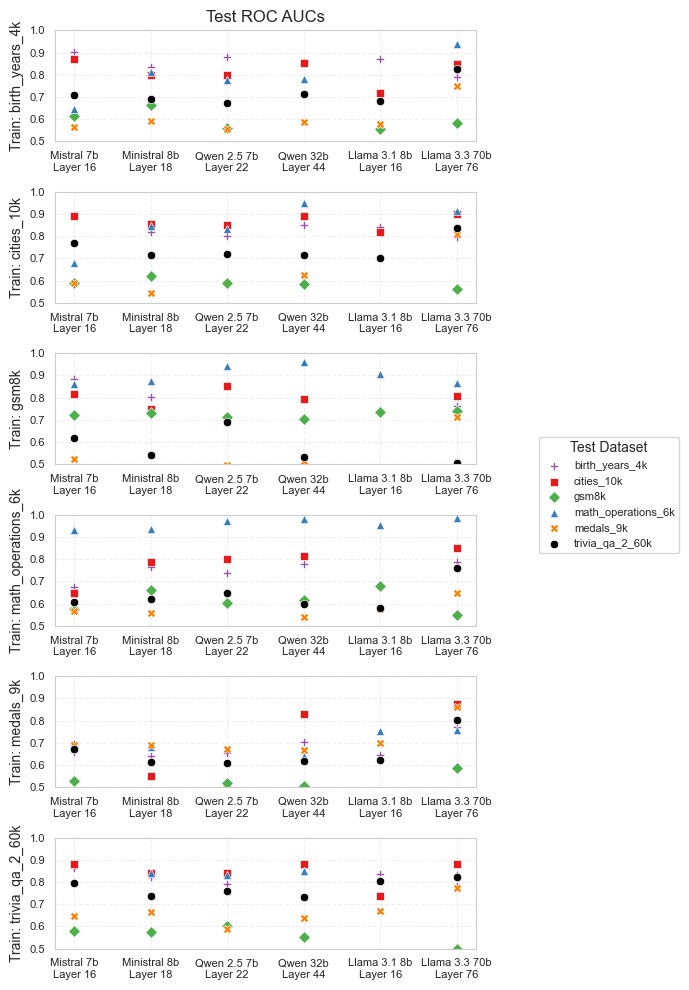

/var/folders/qd/cz9h19sd335142892r1531f40000gn/T/ipykernel_55275/1738827763.py:93: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make space on the right


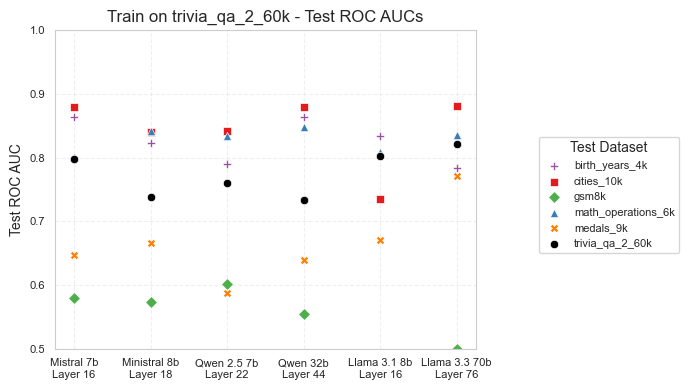

In [491]:
def compare_metric_at_specified_layers_across_models_and_datasets(
        model_stats_dict,
        metric_name,
        save_path=None,
        figsize=(6, 10),
    ):
    stats_df_list = []
    for model_name, model_dict in model_stats_dict.items():
        stats_df = model_dict["stats_df"]

        assert stats_df["input_type_train"].nunique() == 1, f"Input type train is not unique for {model_name}"
        assert stats_df["input_type_test"].nunique() == 1, f"Input type test is not unique for {model_name}"
        assert stats_df["prompt_id_train"].nunique() == 1, f"Prompt id train is not unique for {model_name}"
        assert stats_df["prompt_id_test"].nunique() == 1, f"Prompt id test is not unique for {model_name}"

        layer = model_dict["layer"]
        stats_df = stats_df[stats_df['layer'] == layer]
        assert not stats_df.empty, f"Stats df is empty for {model_name}"

        # should have one row per fold per train dataset per test dataset
        assert len(stats_df) == stats_df["fold"].nunique() * stats_df["dataset_id_train"].nunique() * stats_df["dataset_id_test"].nunique(), f"Stats df has wrong number of rows for {model_name}"

        stats_df = stats_df[[
            'dataset_id_train', 'prompt_id_train',
            'subset_id_train', 'model_id_test',
            'dataset_id_test', 'prompt_id_test', 'subset_id_test',
            'fold', metric_name
        ]]
        stats_df["model_name"] = model_name
        stats_df_list.append(stats_df)
    
    stats_df_combined = pd.concat(stats_df_list)

    stats_df_combined = stats_df_combined[["model_name", "fold", "dataset_id_train", "dataset_id_test", metric_name]]

    stats_df_averaged = stats_df_combined.groupby(["model_name", "dataset_id_train", "dataset_id_test"]).mean().reset_index()

    fig, axes = plt.subplots(
        len(stats_df_averaged["dataset_id_train"].unique()),
        1,
        figsize=figsize,
        constrained_layout=True,
    )
    if not isinstance(axes, np.ndarray):
        axes = [axes]
    order_mapping = {value: idx for idx, value in enumerate(model_stats_dict.keys())}
    stats_df_averaged['sort_key'] = stats_df_averaged['model_name'].map(order_mapping)
    stats_df_averaged = stats_df_averaged.sort_values('sort_key').drop(columns=['sort_key'])
    stats_df_averaged["model_name_with_layer"] = stats_df_averaged["model_name"] + "\nLayer " + stats_df_averaged["model_name"].apply(lambda x: model_stats_dict[x]['layer']).astype(str)
    for i, (ax, train_dataset) in enumerate(zip(axes, stats_df_combined["dataset_id_train"].unique())):
        train_df = stats_df_averaged[stats_df_averaged["dataset_id_train"] == train_dataset]
        for test_dataset, test_df in train_df.groupby("dataset_id_test"):
            sns.scatterplot(
                data=test_df,
                x="model_name_with_layer",
                y=metric_name,
                color=DATASET_COLORS[test_dataset],
                marker=DATASET_MARKERS[test_dataset],
                label=test_dataset,
                ax=ax,
            )

        ax.set_ylim(0.5, 1)
        ax.set_xlabel("")

        ax.grid(True, linestyle='--', alpha=0.3)  # Light grid
        ax.set_facecolor('white') 

        if len(axes) > 1:
            ax.set_ylabel(f"Train: {train_dataset}", fontsize=10)
            if i == 0:
                ax.set_title(f"Test ROC AUCs")
            else:
                ax.set_title("")
        else:
            ax.set_ylabel("Test ROC AUC")
            ax.set_title(f"Train on {train_dataset} - Test ROC AUCs")
    
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(
        handles, 
        labels,
        loc='center right',  # or 'upper center', 'lower center', etc.
        bbox_to_anchor=(1.15, 0.5),  # Adjust these values to position the legend
        title='Test Dataset',
        frameon=True
    )
    for ax in axes:
        ax.get_legend().remove()

    

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make space on the right
    if save_path:
        plt.savefig(
            save_path, 
            bbox_inches='tight',
            pad_inches=0.1,
            dpi=300
        )
    plt.show()
    

compare_metric_at_specified_layers_across_models_and_datasets(
    {
        "Mistral 7b": {"stats_df": mistral_7b_stats_df, "layer": best_layer_mistral_7b},
        "Ministral 8b": {"stats_df": mistral_8b_stats_df, "layer": best_layer_mistral_8b},
        "Qwen 2.5 7b": {"stats_df": qwen_2_7b_stats_df, "layer": best_layer_qwen_2_7b},
        "Qwen 32b": {"stats_df": qwen_32b_stats_df, "layer": best_layer_qwen_32b},
        "Llama 3.1 8b": {"stats_df": llama3_8b_stats_df, "layer": best_layer_llama3_8b},
        "Llama 3.3 70b": {"stats_df": llama3_70b_stats_df, "layer": best_layer_llama3_70b},
    },
    metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc",
    figsize=(6, 10),
    save_path="best_layer_model_comparison.png"
)


compare_metric_at_specified_layers_across_models_and_datasets(
    {
        "Mistral 7b": {"stats_df": mistral_7b_stats_df[mistral_7b_stats_df["dataset_id_train"] == "trivia_qa_2_60k"], "layer": best_layer_mistral_7b},
        "Ministral 8b": {"stats_df": mistral_8b_stats_df[mistral_8b_stats_df["dataset_id_train"] == "trivia_qa_2_60k"], "layer": best_layer_mistral_8b},
        "Qwen 2.5 7b": {"stats_df": qwen_2_7b_stats_df[qwen_2_7b_stats_df["dataset_id_train"] == "trivia_qa_2_60k"], "layer": best_layer_qwen_2_7b},
        "Qwen 32b": {"stats_df": qwen_32b_stats_df[qwen_32b_stats_df["dataset_id_train"] == "trivia_qa_2_60k"], "layer": best_layer_qwen_32b},
        "Llama 3.1 8b": {"stats_df": llama3_8b_stats_df[llama3_8b_stats_df["dataset_id_train"] == "trivia_qa_2_60k"], "layer": best_layer_llama3_8b},
        "Llama 3.3 70b": {"stats_df": llama3_70b_stats_df[llama3_70b_stats_df["dataset_id_train"] == "trivia_qa_2_60k"], "layer": best_layer_llama3_70b},
    },
    metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc",
    figsize=(6, 4),
    save_path="best_layer_model_comparison_trivia_qa_2_60k.png"
)

/var/folders/qd/cz9h19sd335142892r1531f40000gn/T/ipykernel_55275/3533273741.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df["model_name"] = model_name


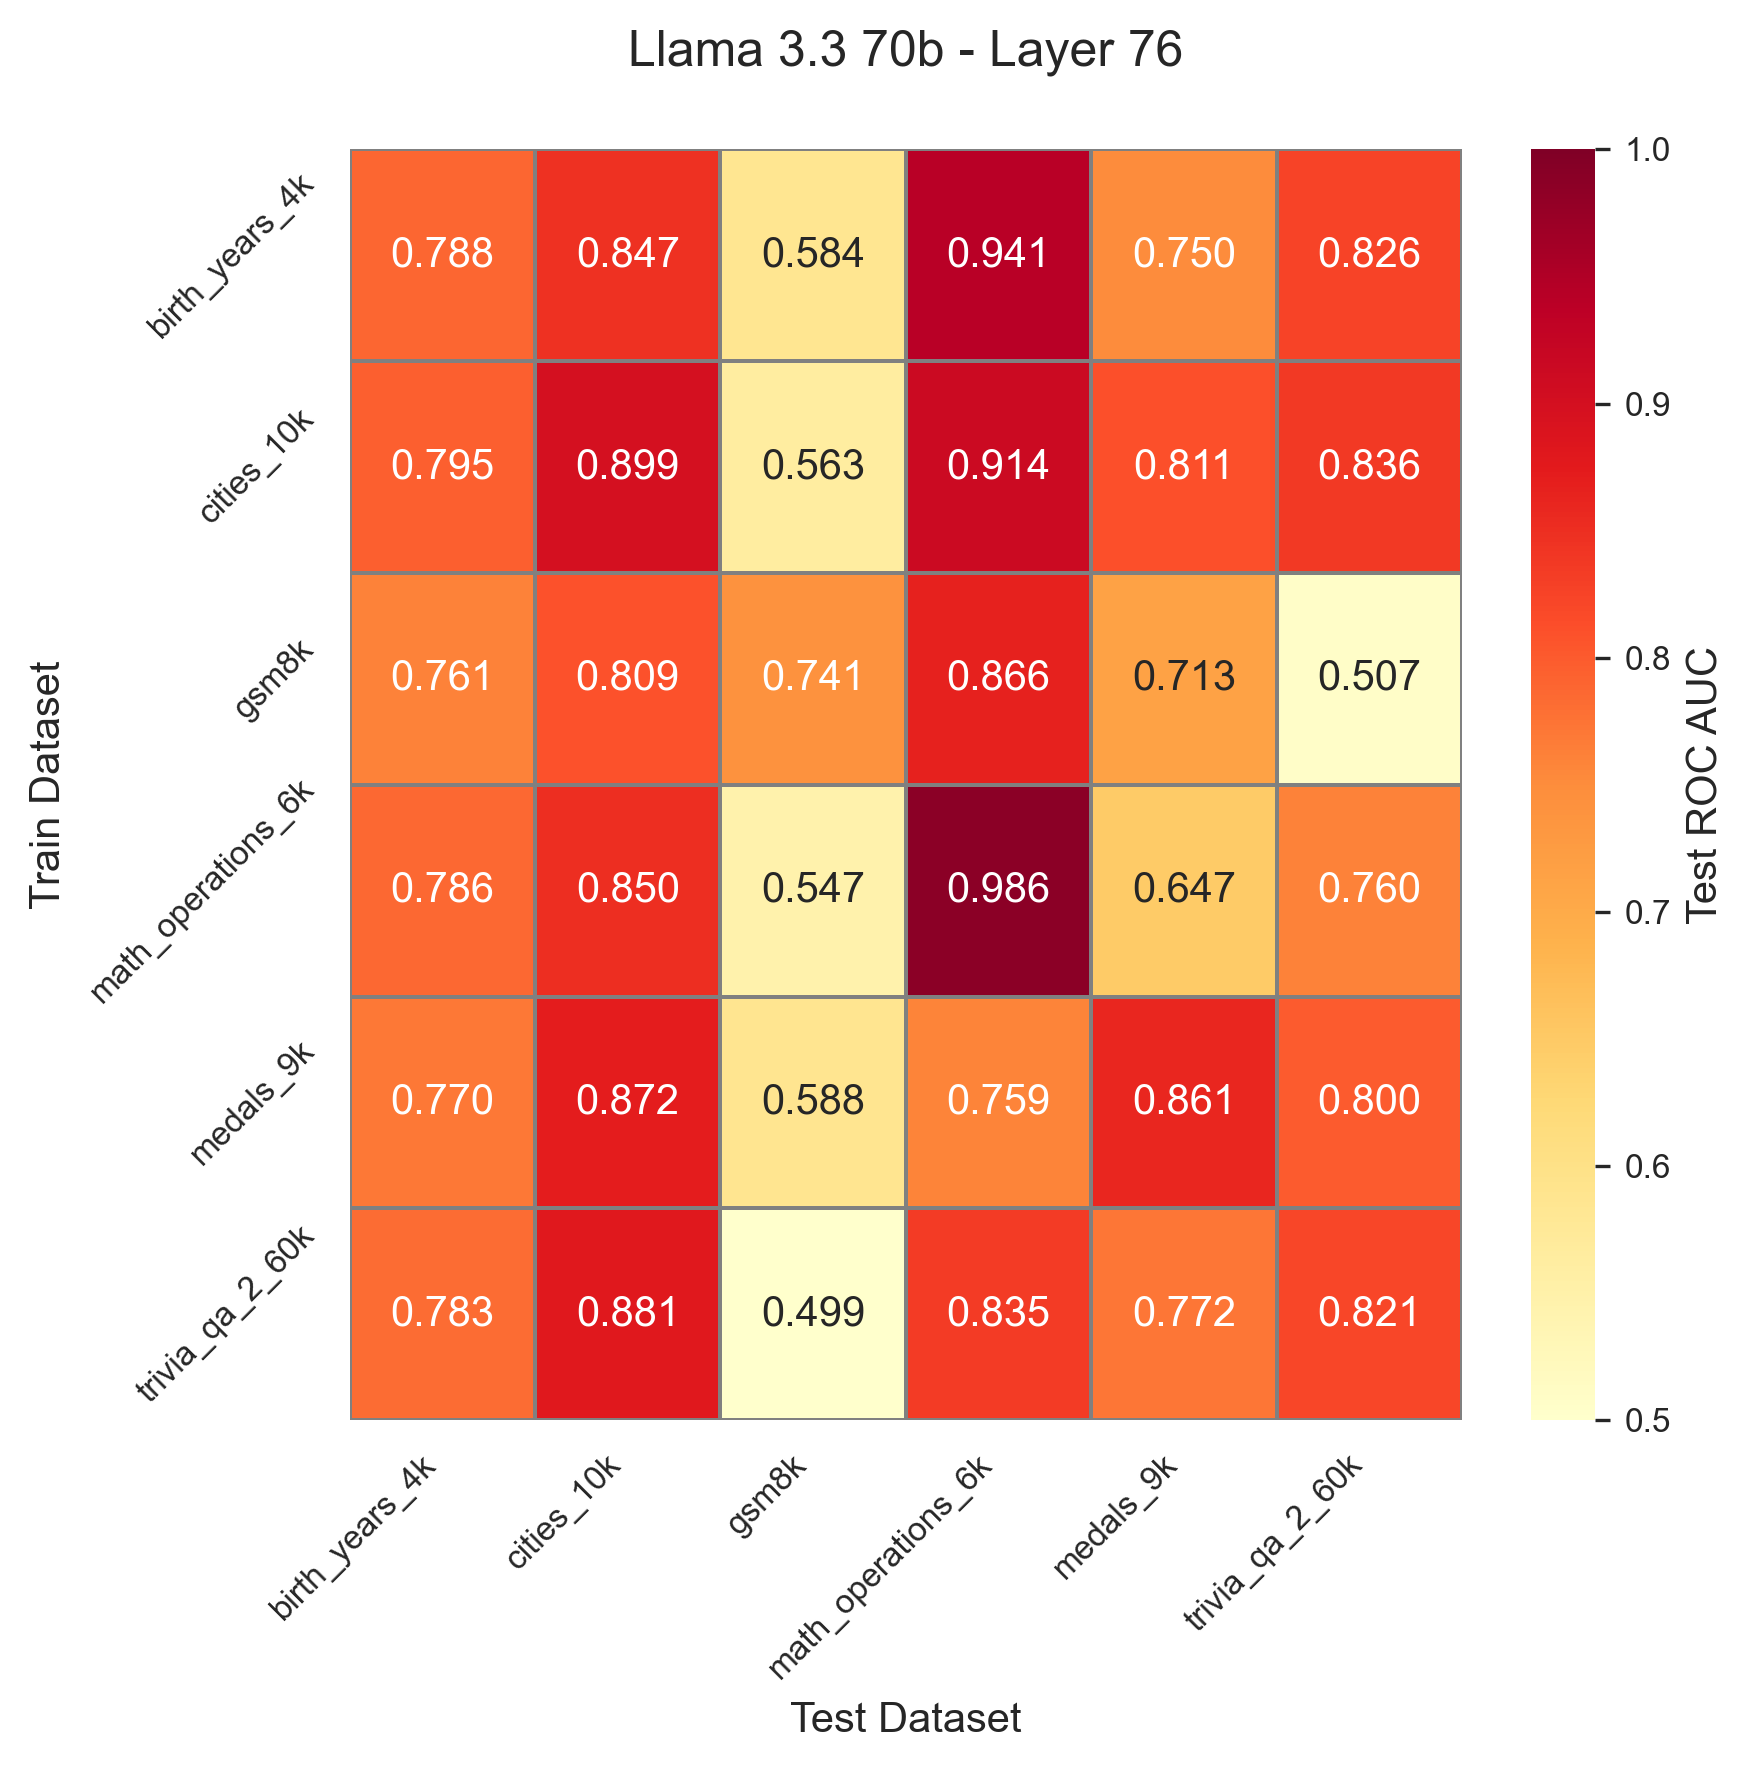

/var/folders/qd/cz9h19sd335142892r1531f40000gn/T/ipykernel_55275/3533273741.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df["model_name"] = model_name


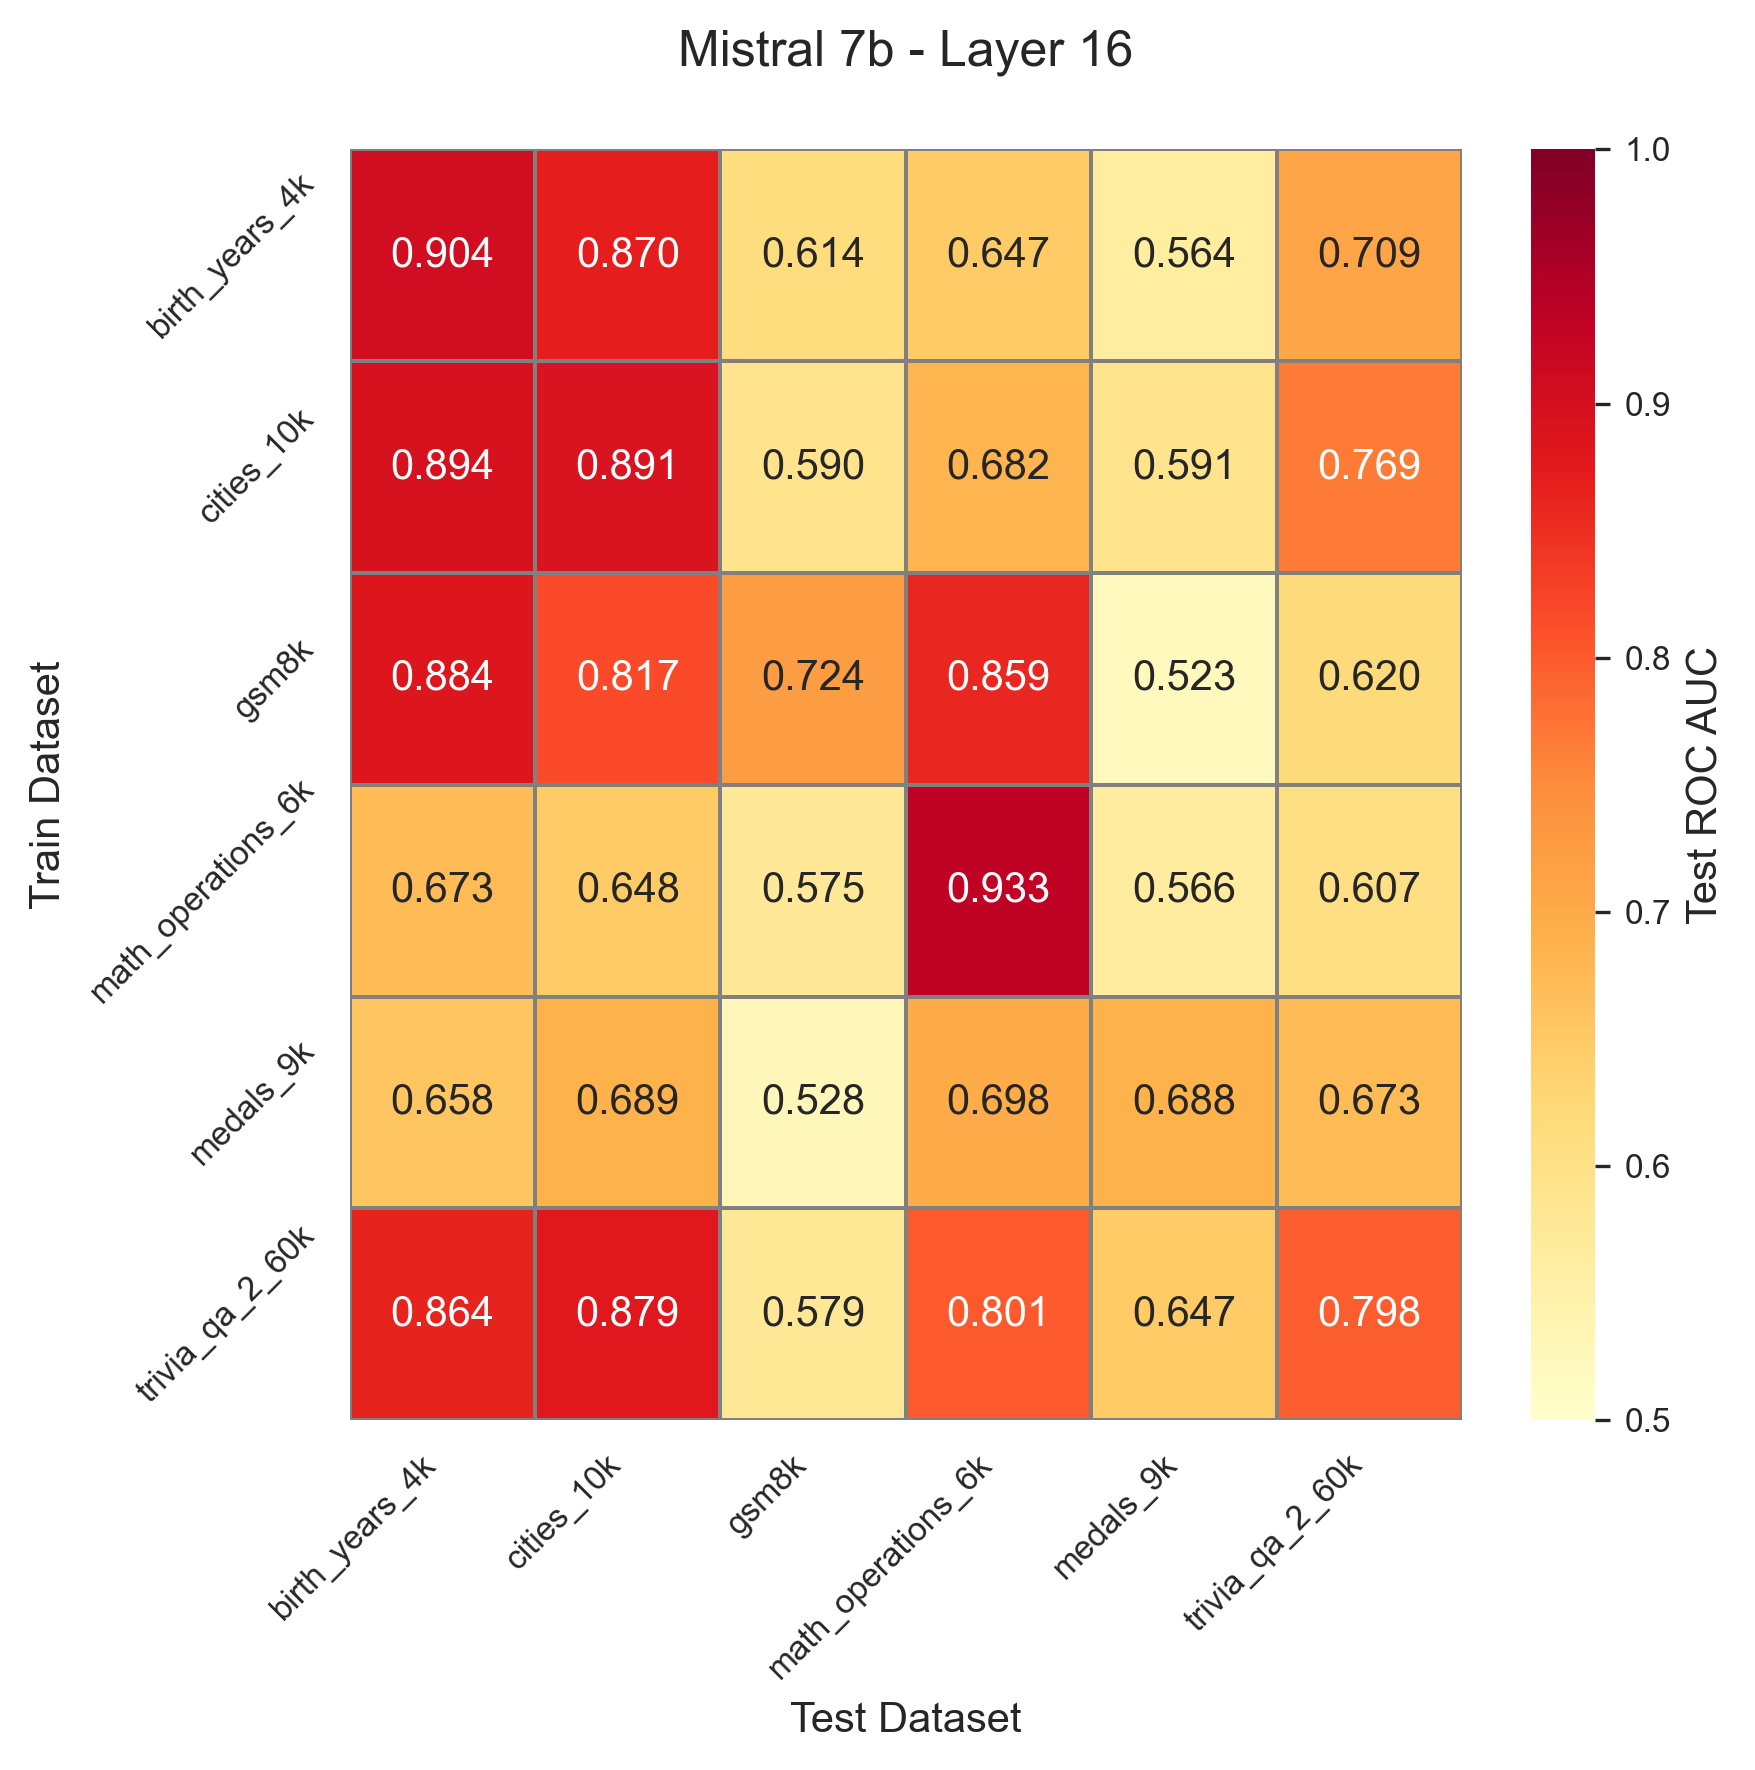

In [476]:
def heatmap_metric_across_train_test_and_dataset_combinations(model_stats_dict, metric_name, figsize=(6, 4), save_path=None):
    assert len(model_stats_dict) == 1, "Only one model is supported"
    model_name, model_dict = list(model_stats_dict.items())[0]
    stats_df = model_dict["stats_df"]

    assert stats_df["input_type_train"].nunique() == 1, f"Input type train is not unique for {model_name}"
    assert stats_df["input_type_test"].nunique() == 1, f"Input type test is not unique for {model_name}"
    assert stats_df["prompt_id_train"].nunique() == 1, f"Prompt id train is not unique for {model_name}, {stats_df['prompt_id_train'].unique()=}"
    assert stats_df["prompt_id_test"].nunique() == 1, f"Prompt id test is not unique for {model_name}"

    layer = model_dict["layer"]
    stats_df = stats_df[stats_df['layer'] == layer]
    assert not stats_df.empty, f"Stats df is empty for {model_name}"

    # should have one row per fold per train dataset per test dataset
    assert len(stats_df) == stats_df["fold"].nunique() * stats_df["dataset_id_train"].nunique() * stats_df["dataset_id_test"].nunique(), f"Stats df has wrong number of rows for {model_name}"


    stats_df["model_name"] = model_name
    stats_df = stats_df[["model_name", "fold", "dataset_id_train", "dataset_id_test", metric_name]]
    stats_df_averaged = stats_df.groupby(["model_name", "dataset_id_train", "dataset_id_test"]).mean().reset_index()

    heatmap_df = stats_df_averaged.pivot(
        index="dataset_id_train",
        columns="dataset_id_test",
        values=metric_name
    )
    # ax = sns.heatmap(data=heatmap_df, annot=True)
    # ax.set_xlabel("Test Dataset")
    # ax.set_ylabel("Train Dataset")
    # ax.set_title(f"{model_name} - Layer {layer}\nTest ROC AUCs")
    # plt.tight_layout()
    # plt.show()

    plt.figure(figsize=figsize, dpi=300)
    sns.set_style("whitegrid")
    sns.heatmap(
        heatmap_df,
        annot=True,
        fmt='.3f',
        cmap='YlOrRd',
        cbar_kws={'label': 'Test ROC AUC'},
        linewidths=0.5,
        linecolor='gray'
    )
    plt.gca().collections[0].set_clim(0.5, 1.0)  # Set colorbar range from 0.5 to 1.0
    plt.title(f'{model_name} - Layer {layer}', pad=20)
    plt.xlabel('Test Dataset')
    plt.ylabel('Train Dataset')
    plt.yticks(rotation=45, ha='right')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    if save_path:
        plt.savefig(
            save_path, 
            bbox_inches='tight',
            pad_inches=0.1,
            dpi=300
        )
    plt.show()
    

    
heatmap_metric_across_train_test_and_dataset_combinations(
    {
        "Llama 3.3 70b": {"stats_df": llama3_70b_stats_df, "layer": best_layer_llama3_70b},
    },
    metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc",
    figsize=(6, 6),
    save_path="llama_3_70b_best_layer_auc_heatmap.png"
)
heatmap_metric_across_train_test_and_dataset_combinations(
    {
        "Mistral 7b": {"stats_df": mistral_7b_stats_df, "layer": best_layer_mistral_7b},
    },
    metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc",
    figsize=(6, 6),
    save_path="mistral_7b_best_layer_auc_heatmap.png"
)

In [477]:
def find_first_good_enough_layer(stats_df, metric_name, threshold=None):
    stats_df = stats_df[stats_df["dataset_id_train"] == "trivia_qa_2_60k"]
    stats_df = stats_df[stats_df["dataset_id_test"] == "trivia_qa_2_60k"]
    means = stats_df[["layer", metric_name]].groupby("layer")[metric_name].mean()
    if threshold is None:
        threshold = means.max() * 0.90
    means = means[means >= threshold].sort_index()
    return means.index[0]

find_first_good_enough_layer_qwen_2_7b = find_first_good_enough_layer(qwen_2_7b_stats_df, metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc")
find_first_good_enough_layer_qwen_32b = find_first_good_enough_layer(qwen_32b_stats_df, metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc")
find_first_good_enough_layer_llama3_8b = find_first_good_enough_layer(llama3_8b_stats_df, metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc")
find_first_good_enough_layer_llama3_70b = find_first_good_enough_layer(llama3_70b_stats_df, metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc")
find_first_good_enough_layer_mistral_8b = find_first_good_enough_layer(mistral_8b_stats_df, metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc")
find_first_good_enough_layer_mistral_7b = find_first_good_enough_layer(mistral_7b_stats_df, metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc")

find_first_good_enough_layer_qwen_2_7b, find_first_good_enough_layer_qwen_32b, find_first_good_enough_layer_llama3_8b, find_first_good_enough_layer_llama3_70b, find_first_good_enough_layer_mistral_8b, find_first_good_enough_layer_mistral_7b


(14, 28, 10, 20, 10, 12)

In [478]:
find_first_good_enough_layer_qwen_2_7b / qwen_2_7b_stats_df["layer"].max(), find_first_good_enough_layer_qwen_32b / qwen_32b_stats_df["layer"].max(), find_first_good_enough_layer_llama3_8b / llama3_8b_stats_df["layer"].max(), find_first_good_enough_layer_llama3_70b / llama3_70b_stats_df["layer"].max(), find_first_good_enough_layer_mistral_8b / mistral_8b_stats_df["layer"].max(), find_first_good_enough_layer_mistral_7b / mistral_7b_stats_df["layer"].max()

(0.5384615384615384,
 0.4666666666666667,
 0.3333333333333333,
 0.2631578947368421,
 0.29411764705882354,
 0.4)

/var/folders/qd/cz9h19sd335142892r1531f40000gn/T/ipykernel_55275/1887368089.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df["model_name"] = model_name
/var/folders/qd/cz9h19sd335142892r1531f40000gn/T/ipykernel_55275/1887368089.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df["model_name"] = model_name
/var/folders/qd/cz9h19sd335142892r1531f40000gn/T/ipykernel_55275/1887368089.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

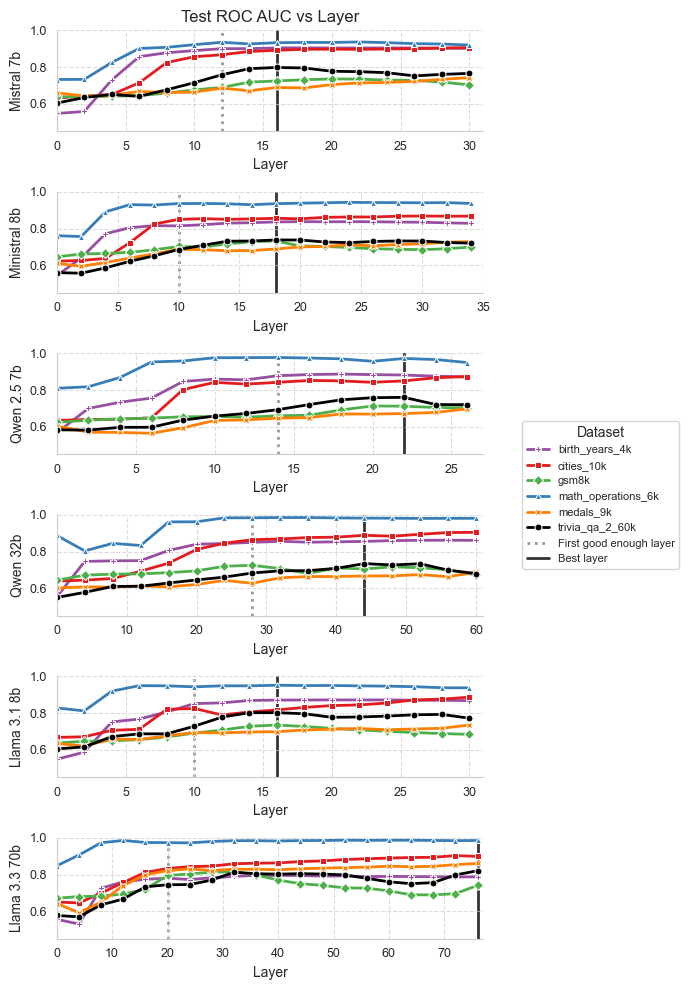

/var/folders/qd/cz9h19sd335142892r1531f40000gn/T/ipykernel_55275/1887368089.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df["model_name"] = model_name
/var/folders/qd/cz9h19sd335142892r1531f40000gn/T/ipykernel_55275/1887368089.py:93: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make space on the right


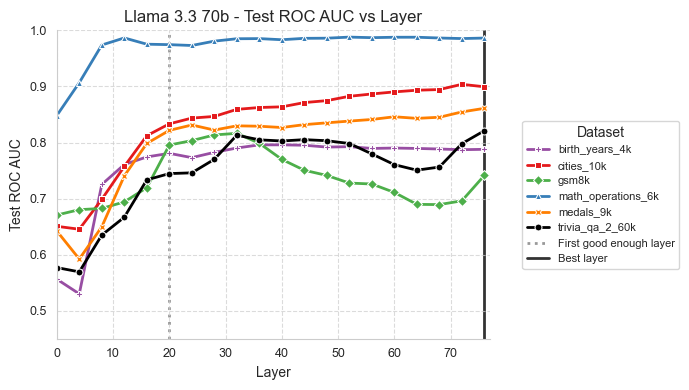

In [ ]:
def plot_in_dataset_performance_across_layers(model_stats_dict, metric_name, figsize=(6, 4), save_path=None):
    fig, axes = plt.subplots(
        len(model_stats_dict),
        1,
        figsize=figsize,
        constrained_layout=True
    )
    if len(model_stats_dict) == 1:
        axes = [axes]
        
    # Define line styles once
    line_styles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1)), (0, (5, 1))]
        
    for i, (ax, model_name) in enumerate(zip(axes, model_stats_dict.keys())):
        stats_df = model_stats_dict[model_name]["stats_df"]

        assert stats_df["input_type_train"].nunique() == 1, f"Input type train is not unique for {model_name}"
        assert stats_df["input_type_test"].nunique() == 1, f"Input type test is not unique for {model_name}"
        assert stats_df["prompt_id_train"].nunique() == 1, f"Prompt id train is not unique for {model_name}, {stats_df['prompt_id_train'].unique()=}"
        assert stats_df["prompt_id_test"].nunique() == 1, f"Prompt id test is not unique for {model_name}"
        assert not stats_df.empty, f"Stats df is empty for {model_name}"

        stats_df = stats_df[stats_df["dataset_id_train"] == stats_df["dataset_id_test"]]
        stats_df["model_name"] = model_name
        stats_df = stats_df[["model_name", "fold", "layer", "dataset_id_train", "dataset_id_test", metric_name]]
        stats_df_averaged = stats_df.groupby(["model_name", "layer", "dataset_id_train", "dataset_id_test"]).mean().reset_index()

        # Keep track of dataset index across all subplots
        for dataset_idx, (dataset_id, dataset_df) in enumerate(stats_df_averaged.groupby("dataset_id_train")):
            sns.lineplot(
                data=dataset_df,
                x="layer",
                y=metric_name,
                label=dataset_id,
                ax=ax,
                linewidth=2,
                marker=DATASET_MARKERS[dataset_id],
                markersize=5,
                markerfacecolor=DATASET_COLORS[dataset_id],
                color=DATASET_COLORS[dataset_id],
                # linestyle=line_styles[dataset_idx % len(line_styles)],
                legend=True
            )

        # Add vertical line for first good enough layer
        first_good_enough_layer = model_stats_dict[model_name]["first_good_enough_layer"]
        ax.axvline(x=first_good_enough_layer, color='gray', linestyle=':', alpha=0.8, linewidth=2, label='First good enough layer', zorder=-1)
        
        # Add vertical line for best layer
        best_layer = model_stats_dict[model_name]["best_layer"] 
        ax.axvline(x=best_layer, color='black', linestyle='-', alpha=0.8, linewidth=2, label='Best layer', zorder=-1)

        ax.set_xlim(0, stats_df["layer"].max() + 1)
        ax.set_ylim(0.45, 1)
            
        ax.set_xlabel("Layer", fontsize=10)


        ax.grid(True, linestyle='--', alpha=0.7)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=9)

        if len(axes) > 1:
            ax.set_ylabel(model_name)
            if i == 0:
                ax.set_title("Test ROC AUC vs Layer")
            else:
                ax.set_title("")
        else:
            ax.set_ylabel("Test ROC AUC")
            ax.set_title(f"{model_name} - Test ROC AUC vs Layer")

    # Get legend handles and labels from first subplot
    handles, labels = axes[0].get_legend_handles_labels()
    
    # Remove individual legends
    for ax in axes:
        ax.get_legend().remove()
        
    # Add single legend outside all subplots
    fig.legend(
        handles,
        labels,
        loc='center right',
        bbox_to_anchor=(1.15, 0.5),
        title='Dataset',
        frameon=True,
    )

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make space on the right
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()



plot_in_dataset_performance_across_layers(
    {
        "Mistral 7b": {"stats_df": mistral_7b_stats_df, "best_layer": best_layer_mistral_7b, "first_good_enough_layer": find_first_good_enough_layer_mistral_7b},
        "Ministral 8b": {"stats_df": mistral_8b_stats_df, "best_layer": best_layer_mistral_8b, "first_good_enough_layer": find_first_good_enough_layer_mistral_8b},
        "Qwen 2.5 7b": {"stats_df": qwen_2_7b_stats_df, "best_layer": best_layer_qwen_2_7b, "first_good_enough_layer": find_first_good_enough_layer_qwen_2_7b},
        "Qwen 32b": {"stats_df": qwen_32b_stats_df, "best_layer": best_layer_qwen_32b, "first_good_enough_layer": find_first_good_enough_layer_qwen_32b},
        "Llama 3.1 8b": {"stats_df": llama3_8b_stats_df, "best_layer": best_layer_llama3_8b, "first_good_enough_layer": find_first_good_enough_layer_llama3_8b},
        "Llama 3.3 70b": {"stats_df": llama3_70b_stats_df, "best_layer": best_layer_llama3_70b, "first_good_enough_layer": find_first_good_enough_layer_llama3_70b},
    },
    metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc",
    figsize=(6, 10),
    save_path="auc_across_layers_all_models.png"
)

plot_in_dataset_performance_across_layers(
    {
        "Llama 3.3 70b": {"stats_df": llama3_70b_stats_df, "best_layer": best_layer_llama3_70b, "first_good_enough_layer": find_first_good_enough_layer_llama3_70b},
    },
    metric_name="direction__center_from_origin_True__classifier_cut_zero__test_roc_auc",
    figsize=(6, 4),
    save_path="auc_across_layers_llama_70b.png"
)
